In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install plotly


  Using cached plotly-5.23.0-py3-none-any.whl.metadata (7.3 kB)
Using cached plotly-5.23.0-py3-none-any.whl (17.3 MB)


In [4]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [5]:
#Load the dataset
df = pd.read_csv(r"C:\Users\gyanp\Downloads\insurance.csv")

In [6]:
df.head()

Age  Diabetes  BloodPressureProblems  AnyTransplants  AnyChronicDiseases  \
0   45         0                      0               0                   0   
1   60         1                      0               0                   0   
2   36         1                      1               0                   0   
3   52         1                      1               0                   1   
4   38         0                      0               0                   1   

   Height  Weight  KnownAllergies  HistoryOfCancerInFamily  \
0     155      57               0                        0   
1     180      73               0                        0   
2     158      59               0                        0   
3     183      93               0                        0   
4     166      88               0                        0   

   NumberOfMajorSurgeries  PremiumPrice  
0                       0         25000  
1                       0         29000  
2                       1         23000  
3                       2         28000  
4                       1         23000

In [7]:
df.shape

# The dataset has 986 records with 11 features

(986, 11)

In [8]:
df.columns

# The features of dataset are:

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice'],
      dtype='object')

In [9]:
#Overview of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [10]:
#check for missing value
df.isnull().sum().sum()

# There are no missing values

0

In [11]:
# check for duplicacy
df.duplicated().sum()

# There are no duplicate entries in dataset

0

In [12]:
# Data type inspection
df.dtypes

# Each feature is of int type

Age                        int64
Diabetes                   int64
BloodPressureProblems      int64
AnyTransplants             int64
AnyChronicDiseases         int64
Height                     int64
Weight                     int64
KnownAllergies             int64
HistoryOfCancerInFamily    int64
NumberOfMajorSurgeries     int64
PremiumPrice               int64
dtype: object

In [13]:
# Numerical features
numerical_features = ['Age', 'Height', 'Weight', 'PremiumPrice']
categorical_features = ['Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 
                        'KnownAllergies', 'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries']

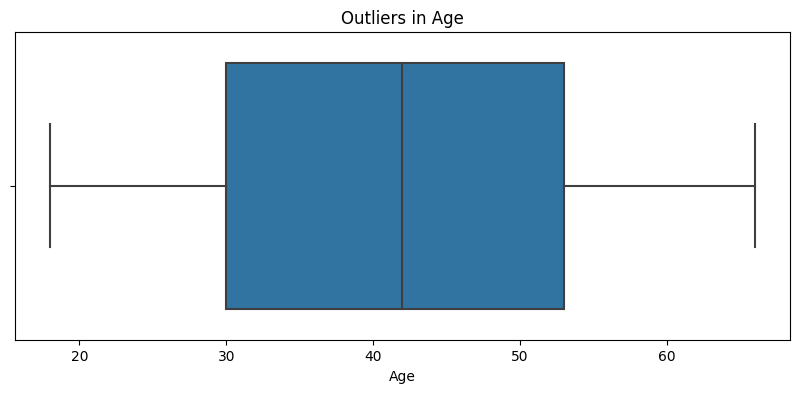

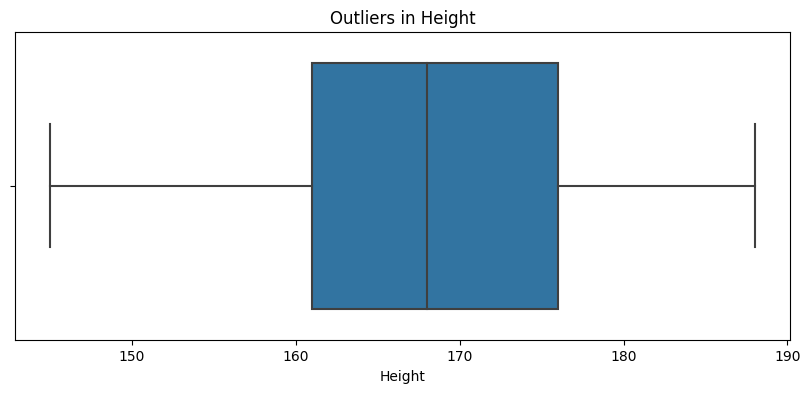

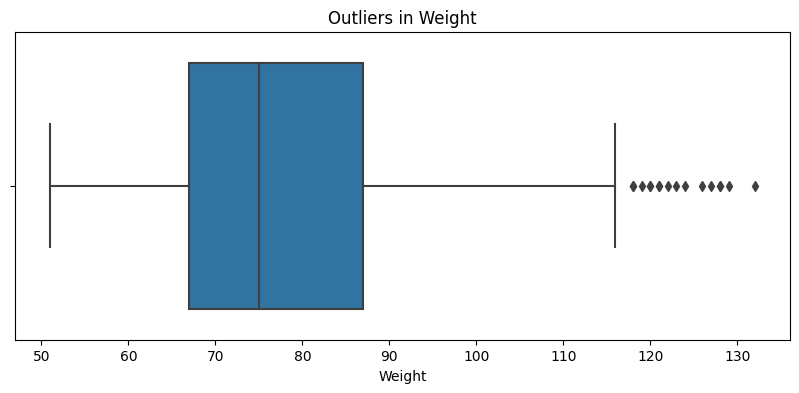

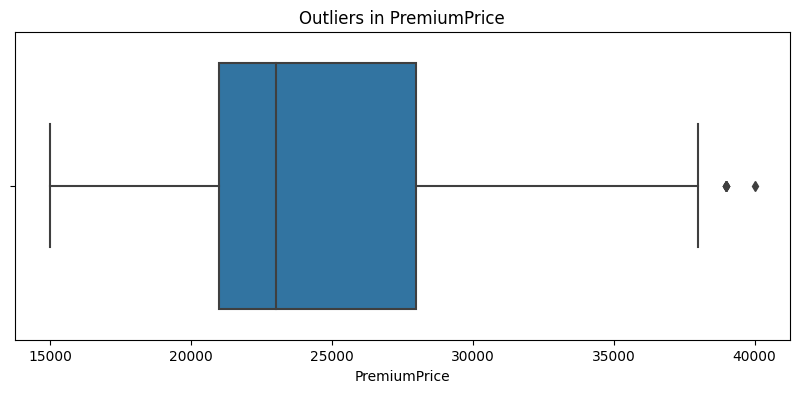

In [14]:
# Handling Outliers

# Box plots to identify outliers
for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[feature])
    plt.title(f'Outliers in {feature}')
    plt.show()

# There are outliers in Weight and premium Price. 
# However, there are very less outliers which can be removed.

# Handling outliers using IQR method
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# Filter out the outliers
df = df[~((df[numerical_features] < (Q1 - 1.5 * IQR)) | (df[numerical_features] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [15]:
df[["Age","Height","Weight","PremiumPrice"]].describe().T

# Mean age in dataset is 41 years. The minimum and maximum age are 18 and 66 respectively.
# Mean height in dataset is 168 cm. The minimum and maximum height are 145 and 188 respectively.
# Mean weight in dataset is 76 Kg. The minimum and maximum weight are 51 and 116 respectively.

count          mean          std      min      25%      50%  \
Age           965.0     41.843523    13.876881     18.0     30.0     42.0   
Height        965.0    168.238342    10.136577    145.0    161.0    168.0   
Weight        965.0     76.191710    13.063583     51.0     67.0     75.0   
PremiumPrice  965.0  24248.704663  6128.830488  15000.0  21000.0  23000.0   

                  75%      max  
Age              53.0     66.0  
Height          176.0    188.0  
Weight           86.0    116.0  
PremiumPrice  28000.0  38000.0

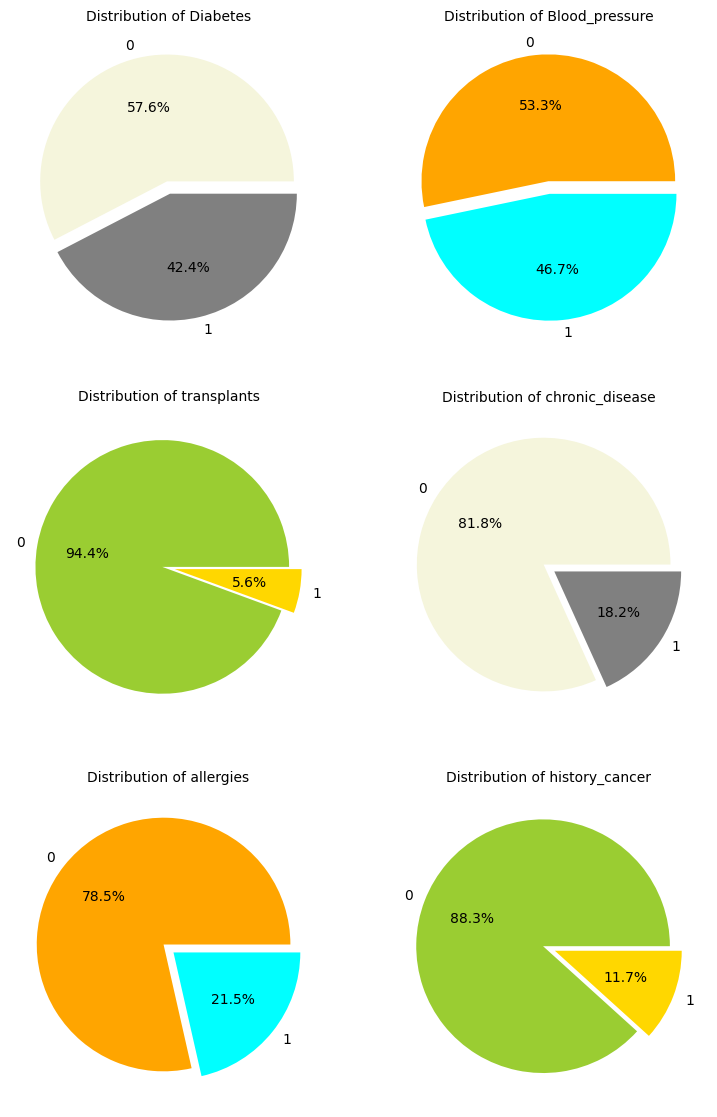

In [16]:
d1 = pd.DataFrame(df["Diabetes"].value_counts().reset_index())
d1.columns = ["Diabetes","Count"]
d1["% count"] = round((d1["Count"]/len(df))*100,2)

d2 = pd.DataFrame(df['BloodPressureProblems'].value_counts().reset_index())
d2.columns = ['BloodPressureProblems',"Count"]
d2["% count"] = round((d2["Count"]/len(df))*100,2)

d3 = pd.DataFrame(df['AnyTransplants'].value_counts().reset_index())
d3.columns = ["AnyTransplants","Count"]
d3["% count"] = round((d3["Count"]/len(df))*100,2)

d4 = pd.DataFrame(df['AnyChronicDiseases'].value_counts().reset_index())
d4.columns = ['AnyChronicDiseases',"Count"]
d4["% count"] = round((d4["Count"]/len(df))*100,2)

d5 = pd.DataFrame(df['KnownAllergies'].value_counts().reset_index())
d5.columns = ['KnownAllergies',"Count"]
d5["% count"] = round((d5["Count"]/len(df))*100,2)

d6 = pd.DataFrame(df['HistoryOfCancerInFamily'].value_counts().reset_index())
d6.columns = ['HistoryOfCancerInFamily',"Count"]
d6["% count"] = round((d6["Count"]/len(df))*100,2)

d7 = pd.DataFrame(df['NumberOfMajorSurgeries'].value_counts().reset_index())
d7.columns = ['NumberOfMajorSurgeries',"Count"]
d7["% count"] = round((d7["Count"]/len(df))*100,2)

plt.figure(figsize = (9,14))

explode_Diabetes = (0.05,0.05)
explode_Blood_pressure = (0.05,0.05)
explode_transplants = (0.05,0.05)
explode_chronic_disease = (0.05,0.05)
explode_allergies = (0.05,0.05)
explode_history_cancer = (0.05,0.05)

colors_Diabetes = ['beige',"grey"]
colors_Blood_pressure = ["orange", "cyan"]
colors_transplants = ['yellowgreen','gold']
colors_working_day = ["cyan", 'lightskyblue']
colors_chronic_disease = ['beige',"grey"]
colors_allergies = ["orange", "cyan"]
colors_history_cancer = ['yellowgreen','gold']

plt.subplot(3,2,1)
plt.pie(d1["Count"], labels=d1["Diabetes"], explode=explode_Diabetes,colors = colors_Diabetes, 
        autopct='%1.1f%%')
plt.title("Distribution of Diabetes", fontsize = 10)

plt.subplot(3,2,2)
plt.pie(d2["Count"], labels=d2['BloodPressureProblems'], explode=explode_Blood_pressure,colors = colors_Blood_pressure, 
        autopct='%1.1f%%')
plt.title("Distribution of Blood_pressure", fontsize = 10)

plt.subplot(3,2,3)
plt.pie(d3["Count"], labels=d3["AnyTransplants"], explode=explode_transplants,
        colors = colors_transplants, autopct='%1.1f%%')
plt.title("Distribution of transplants", fontsize = 10)

plt.subplot(3,2,4)
plt.pie(d4["Count"], labels=d4['AnyChronicDiseases'], explode=explode_chronic_disease,colors = colors_chronic_disease, 
        autopct='%1.1f%%')
plt.title("Distribution of chronic_disease", fontsize = 10)

plt.subplot(3,2,5)
plt.pie(d5["Count"], labels=d5["KnownAllergies"], explode=explode_allergies,
        colors = colors_allergies, autopct='%1.1f%%')
plt.title("Distribution of allergies", fontsize = 10)

plt.subplot(3,2,6)
plt.pie(d6["Count"], labels=d6['HistoryOfCancerInFamily'], explode=explode_history_cancer,colors = colors_history_cancer, 
        autopct='%1.1f%%')
plt.title("Distribution of history_cancer", fontsize = 10)

plt.show()

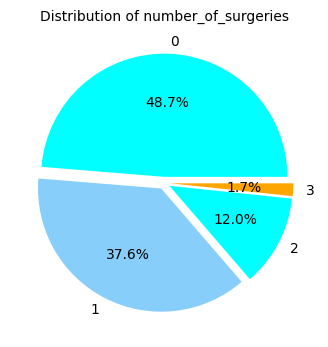

In [17]:
explode_no_surgeries = (0.05,0.05,0.05,0.05)
colors_no_surgeries = ["cyan", 'lightskyblue', "cyan","orange"]

plt.figure(figsize = (7,4))
plt.pie(d7["Count"], labels=d7['NumberOfMajorSurgeries'], explode=explode_no_surgeries,colors = colors_no_surgeries, 
        autopct='%1.1f%%')
plt.title("Distribution of number_of_surgeries", fontsize = 10)
plt.show()

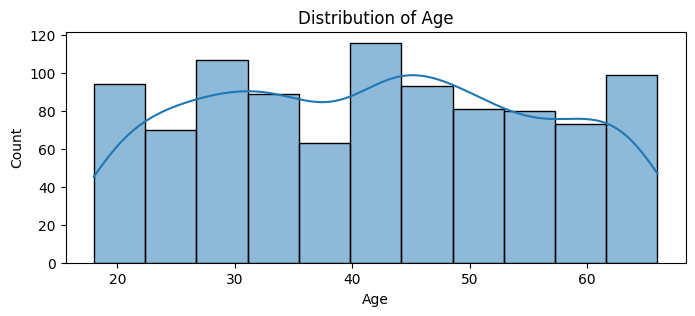

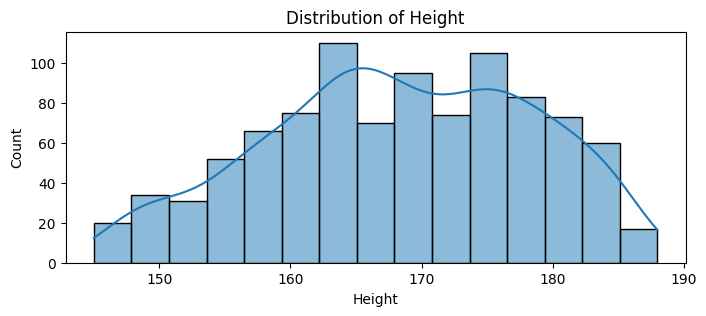

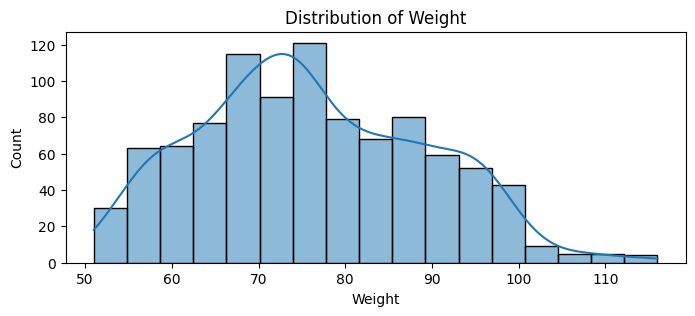

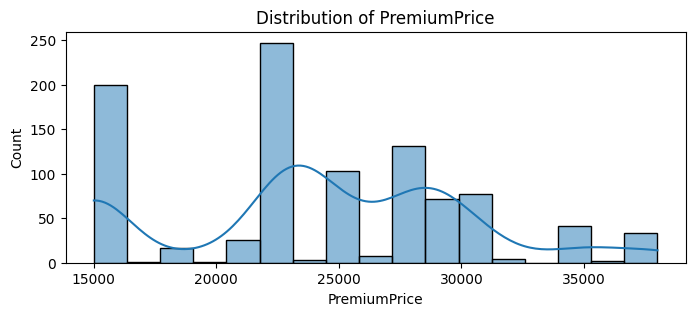

In [18]:
# Univariate Analysis

for feature in numerical_features:
    plt.figure(figsize=(8, 3))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

In [19]:
import plotly.express as px

# Function to create count plots with percentages
def plot_count_with_percentage(df, features):
    for feature in features:
        # Calculate value counts and percentages
        counts = df[feature].value_counts().reset_index()
        counts.columns = [feature, 'Count']
        counts['Percentage'] = (counts['Count'] / counts['Count'].sum()) * 100

        # Create the plot
        fig = px.bar(counts, x=feature, y='Count', text='Percentage',
                     labels={feature: feature, 'Count': 'Frequency'},
                     title=f'Frequency of {feature}')

        # Update layout to show percentages on hover
        fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
        fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
        
        # Show the plot
        fig.show()

# Call the function
plot_count_with_percentage(df, categorical_features)

# There is very less difference between percentages of diabetic and non-diabetic patients.
# Similary, less percentage difference between patients having blood pressure problems and people who do not.
# Only 5.6% patients have transplant history.
# About 18.24% patients have any chronic diseases.
# About 21.45% patients are suffering from Allergy problems.
# 11.71% patients have family history of Cancer.
# 1.67% patients have undergone three surgeries, 12.02 % patients undergone two surgeries
# 37.62% patients have one surgery and 48.70% didn't go any surgery.

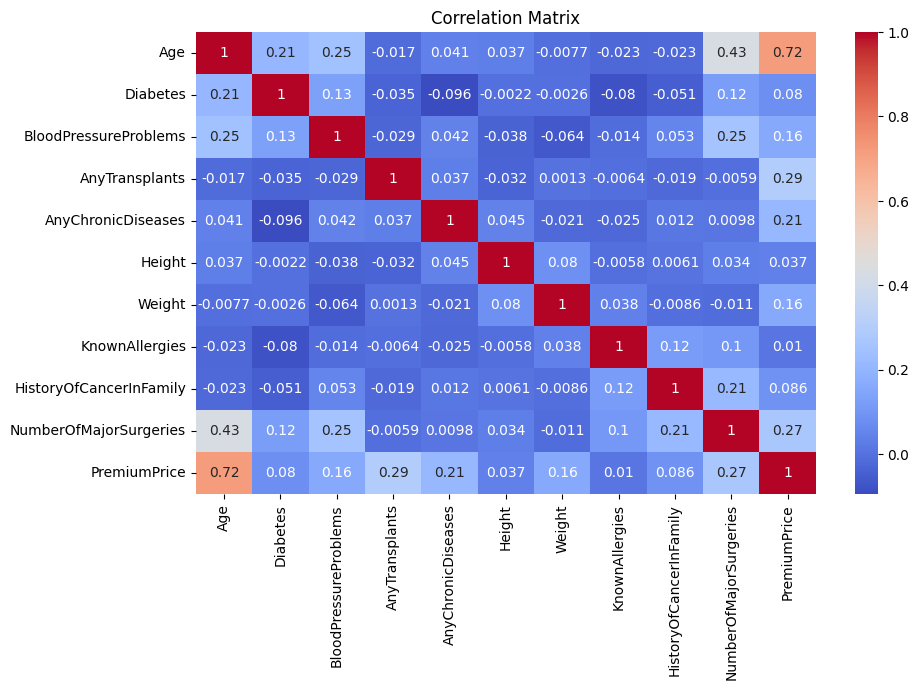

In [20]:
#Bivariate Analysis

# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Age is showing high correlation with Premium Price

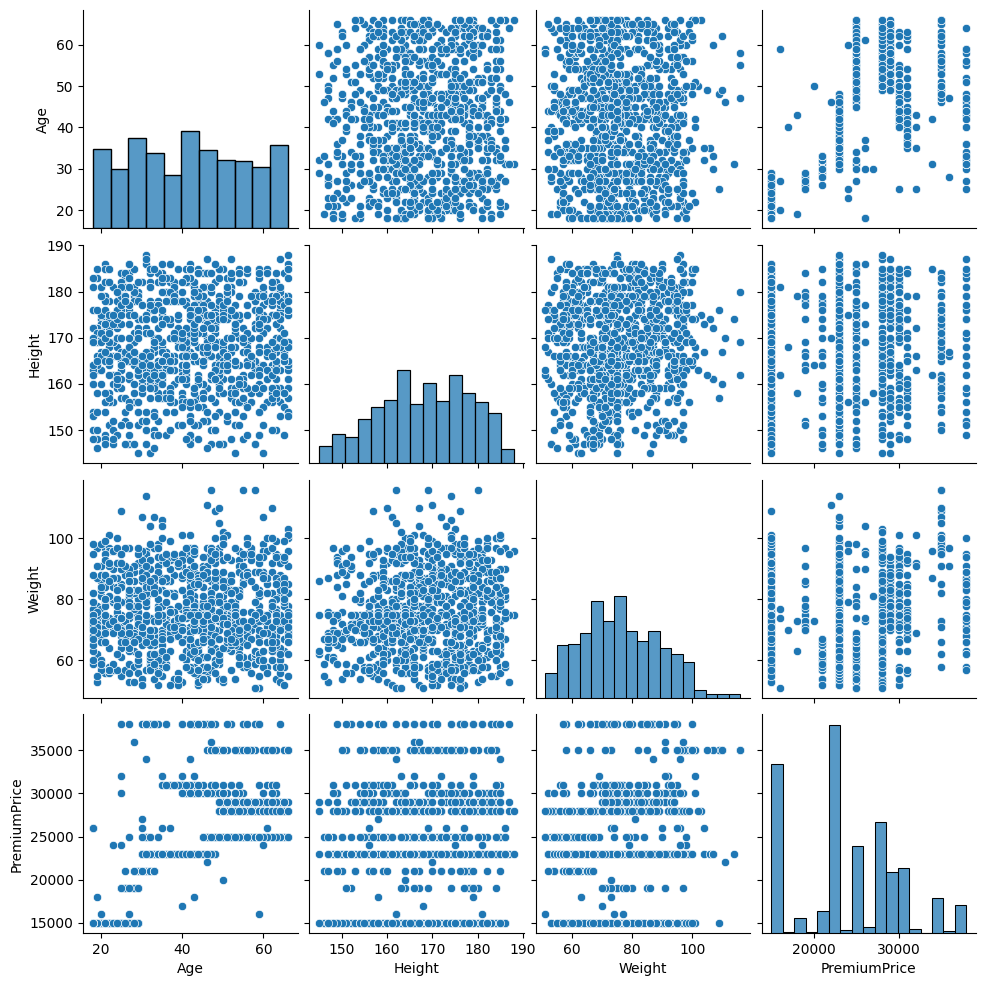

In [21]:
# Scatter plots
sns.pairplot(df, vars=['Age', 'Height', 'Weight', 'PremiumPrice'])
plt.show()

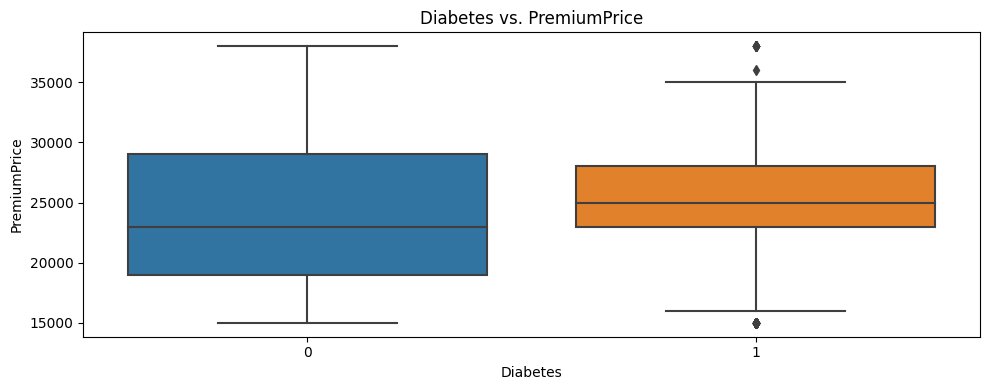

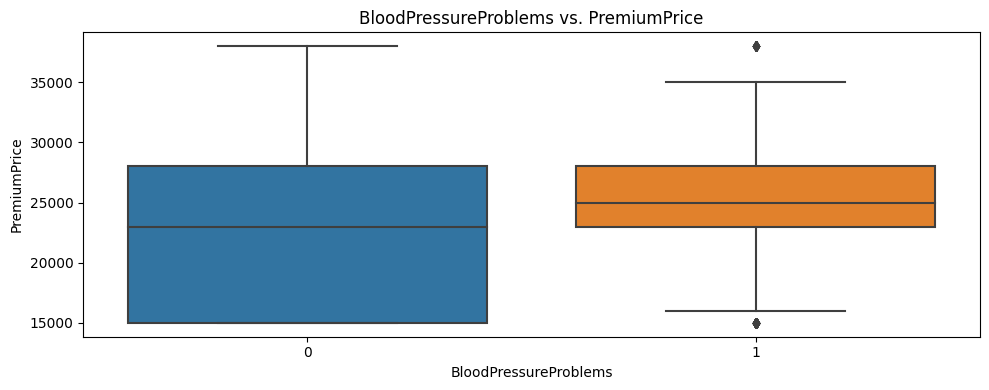

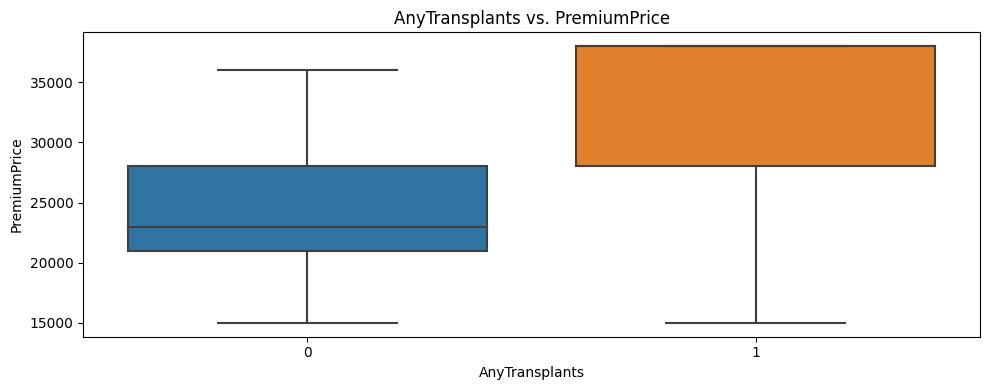

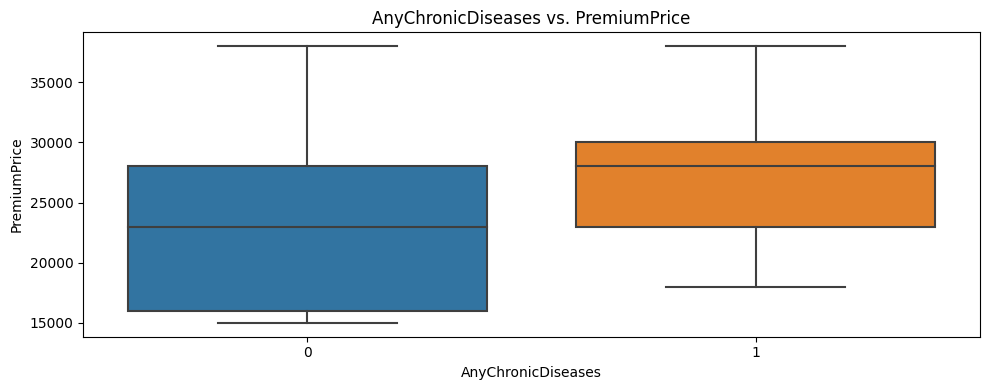

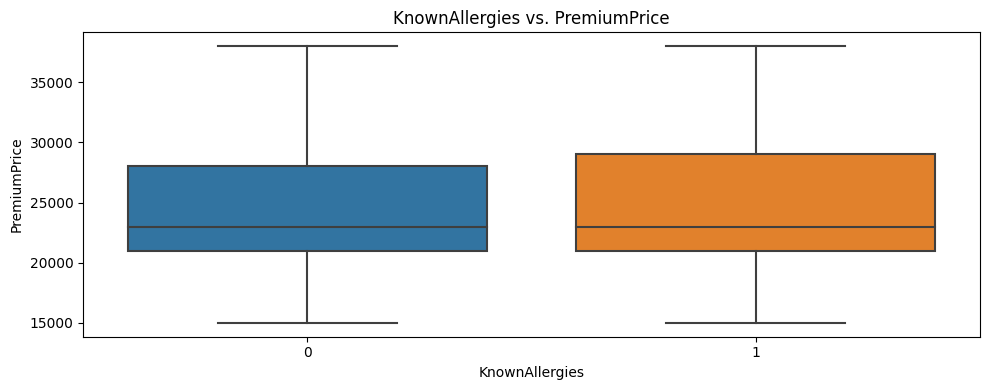

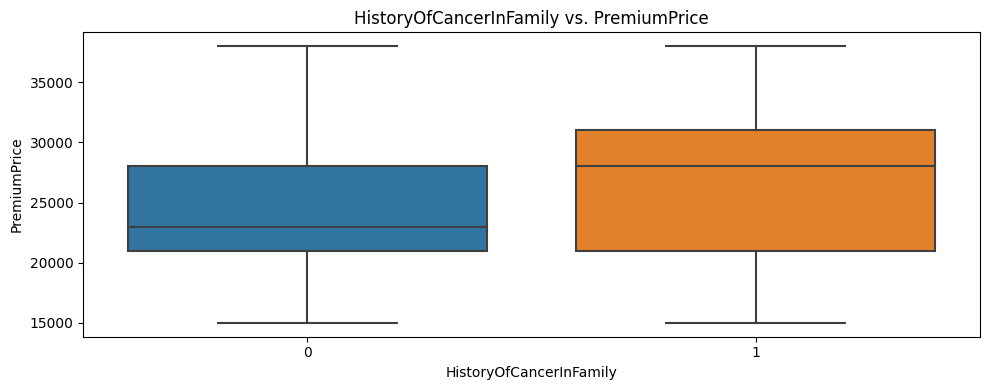

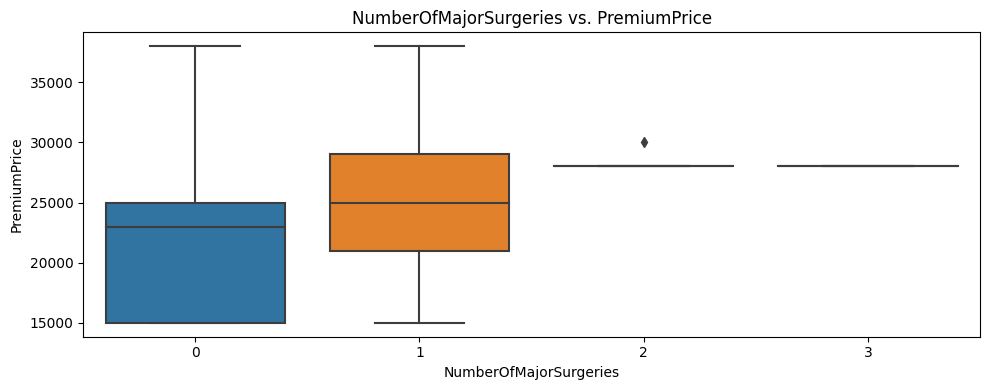

In [22]:
# Box plots for categorical vs. Premium Price
for feature in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[feature], y=df['PremiumPrice'])
    plt.title(f'{feature} vs. PremiumPrice')
    plt.tight_layout()
    plt.show()

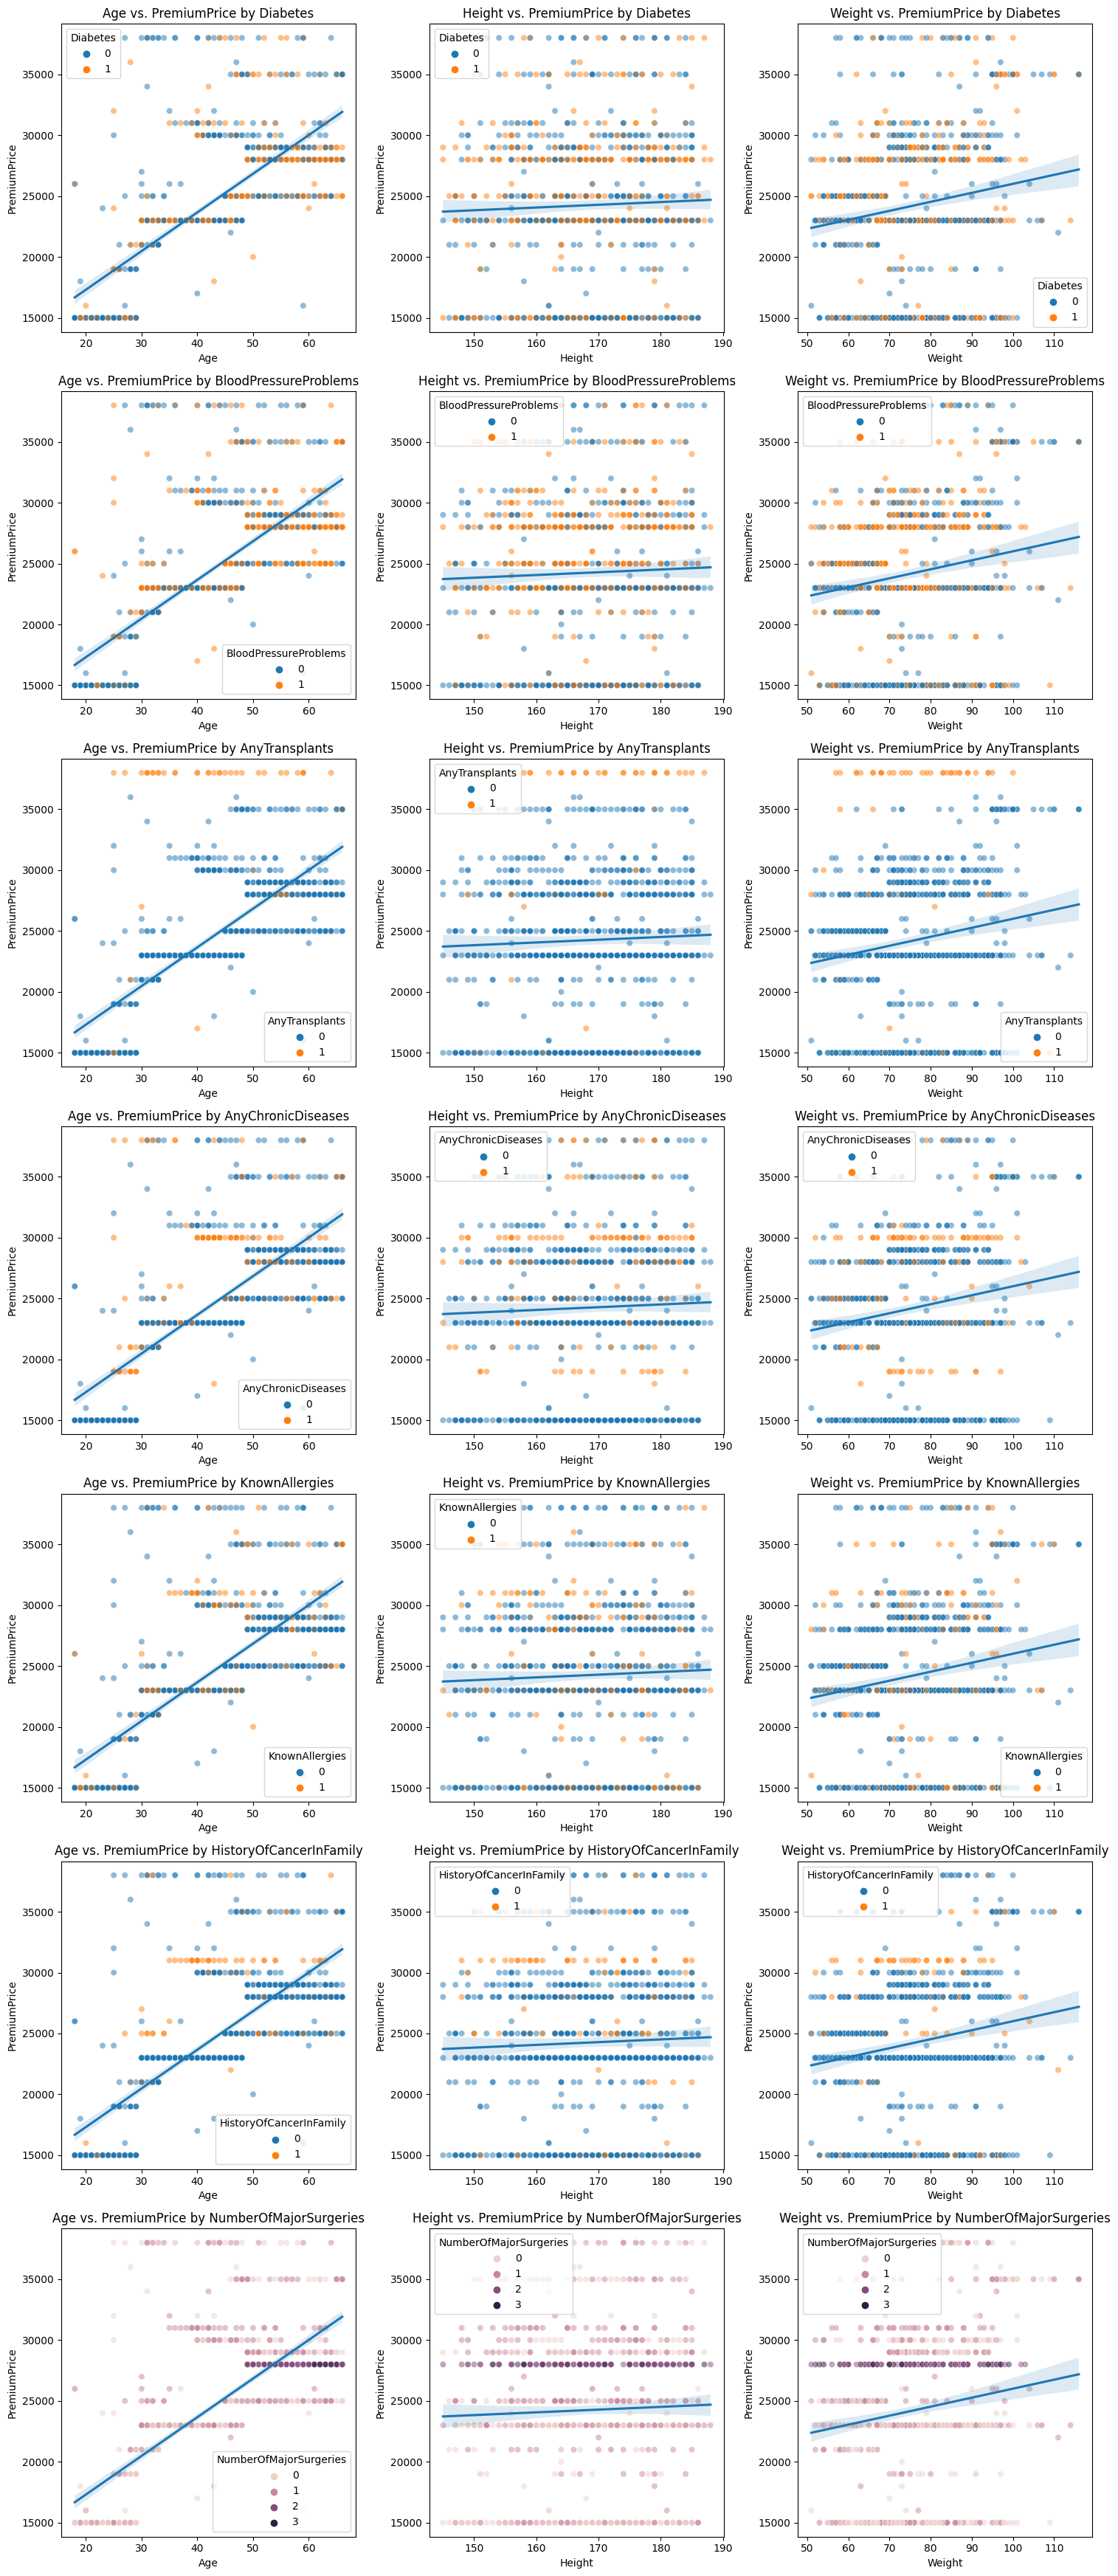

In [23]:
#Multivariate Analysis

num_features = ['Age', 'Height', 'Weight']

# Determine the grid size
n_rows = len(categorical_features)
n_cols = len(num_features)

# Create a figure with a specified size
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 5))

# Loop through each categorical and numerical feature and create regplots and scatterplots
for i, cat in enumerate(categorical_features):
    for j, num in enumerate(num_features):
        ax = axes[i, j]
        sns.scatterplot(x=num, y='PremiumPrice', hue=cat, data=df, ax=ax, alpha=0.5)
        sns.regplot(x=num, y='PremiumPrice', data=df, scatter=False, ax=ax)
        ax.set_title(f'{num} vs. PremiumPrice by {cat}')
        ax.set_xlabel(num)
        ax.set_ylabel('PremiumPrice')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [24]:
# Hypothesis testing
from scipy import stats

# List of binary categorical variables
binary_variables = ['Diabetes','BloodPressureProblems','AnyTransplants','AnyChronicDiseases','KnownAllergies','HistoryOfCancerInFamily']

# Significance level
alpha = 0.05

for var in binary_variables:
    # Separate the data into two groups
    group_0 = df[df[var] == 0]['PremiumPrice']
    group_1 = df[df[var] == 1]['PremiumPrice']
    
    # Perform the t-test
    t_stat, p_value = stats.ttest_ind(group_0, group_1)
    
    # Print the hypotheses and results
    print(f"\033[1mTesting the effect of {var} on insurance price\033[0m")
    print(f"\033[1mNull Hypothesis (H0)\033[0m: {var} has no effect on the insurance price.")
    print(f"\033[1mAlternative Hypothesis (H1)\033[0m: {var} has a significant effect on the insurance price.")
    print(f"\033[1mP-value\033[0m: {p_value}")
    
    if p_value < alpha:
        print("\033[1mReject the null hypothesis\033[0m: There is a significant effect of {} on insurance price.".format(var))
    else:
        print("\033[1mFail to reject the null hypothesis\033[0m: There is no significant effect of {} on insurance price.".format(var))
    
    # Print a delimiter
    print("\033[1m-\033[0m" * 100)


Testing the effect of Diabetes on insurance price
Null Hypothesis (H0): Diabetes has no effect on the insurance price.
Alternative Hypothesis (H1): Diabetes has a significant effect on the insurance price.
P-value: 0.013478739494740767
Reject the null hypothesis: There is a significant effect of Diabetes on insurance price.
----------------------------------------------------------------------------------------------------
Testing the effect of BloodPressureProblems on insurance price
Null Hypothesis (H0): BloodPressureProblems has no effect on the insurance price.
Alternative Hypothesis (H1): BloodPressureProblems has a significant effect on the insurance price.
P-value: 9.121787503869264e-07
Reject the null hypothesis: There is a significant effect of BloodPressureProblems on insurance price.
----------------------------------------------------------------------------------------------------
Testing the effect of AnyTransplants on insurance price
Null Hypothesis (H0): AnyTransplants 

In [25]:
# Hypothesis testing for numerical features
num_vars = ['Age', 'Height', 'Weight', 'NumberOfMajorSurgeries']
alpha = 0.05
for var in num_vars:
    corr_coef, p_value = stats.pearsonr(df[var], df['PremiumPrice'])
    if p_value < alpha:
      print(f"Correlation between {var} and 'PremiumPrice' is significant at the {alpha} level.")
    else:
      print(f"Correlation between {var} and 'PremiumPrice' is not significant at the {alpha} level.")
    print("--------------------------------------------------------------------------------------------")

Correlation between Age and 'PremiumPrice' is significant at the 0.05 level.
--------------------------------------------------------------------------------------------
Correlation between Height and 'PremiumPrice' is not significant at the 0.05 level.
--------------------------------------------------------------------------------------------
Correlation between Weight and 'PremiumPrice' is significant at the 0.05 level.
--------------------------------------------------------------------------------------------
Correlation between NumberOfMajorSurgeries and 'PremiumPrice' is significant at the 0.05 level.
--------------------------------------------------------------------------------------------


In [26]:
#Feature Engineering

# Calculate BMI
df['BMI'] = df['Weight'] / (df['Height'] / 100) ** 2

# Check the new feature
print(df[['Height', 'Weight', 'BMI']].head())

   Height  Weight        BMI
0     155      57  23.725286
1     180      73  22.530864
2     158      59  23.634033
3     183      93  27.770313
4     166      88  31.934969


In [27]:
# Preprocessing of Data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Define the categorical features
cat_features = ['Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases',
                'KnownAllergies', 'HistoryOfCancerInFamily']

# Define the numerical features
num_features = ['Age', 'Height', 'Weight', 'NumberOfMajorSurgeries']

# Define the target variable
target = 'PremiumPrice'

# Separate features and target
X = df.drop(columns=[target])
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
# Preprocessing for numerical features 
num_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# Combine preprocessing steps
preprocessor = ColumnTransformer(transformers=[('num', num_transformer, num_features),
                                               ('cat', 'passthrough', cat_features)])

# Preprocess the training data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Convert to DataFrame for better readability (optional)
X_train_df = pd.DataFrame(X_train, columns=num_features + cat_features)
X_test_df = pd.DataFrame(X_test, columns=num_features + cat_features)

print("Preprocessed Training Data")
print(X_train_df.head())

print("Preprocessed Testing Data")
print(X_test_df.head())

Preprocessed Training Data
        Age    Height    Weight  NumberOfMajorSurgeries  Diabetes  \
0  0.462279 -1.836207 -0.700514                0.442787       1.0   
1 -1.549929  0.357991  0.746078               -0.882141       1.0   
2 -1.262471  0.357991 -0.091423                0.442787       0.0   
3  1.396519 -0.539635 -0.776651                0.442787       0.0   
4 -0.687554  1.355354 -0.472105               -0.882141       0.0   

   BloodPressureProblems  AnyTransplants  AnyChronicDiseases  KnownAllergies  \
0                    0.0             0.0                 0.0             0.0   
1                    1.0             0.0                 0.0             0.0   
2                    0.0             0.0                 0.0             0.0   
3                    1.0             0.0                 1.0             0.0   
4                    0.0             0.0                 1.0             0.0   

   HistoryOfCancerInFamily  
0                      1.0  
1                  

In [30]:
# Modeling and Evaluation

# import algorithms for model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb

# import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_error, mean_absolute_error

# Initialize the models
models = {  "Linear Regression": LinearRegression(),
        "Decision Tree Regression": DecisionTreeRegressor(random_state=42),
        "Random Forest Regression": RandomForestRegressor(random_state=42),
        "Support Vector Regression": SVR(),
        "Gradient Boosting Regression": GradientBoostingRegressor(random_state=42),
         "xgb Regression": xgb.XGBRegressor(objective='reg:squarederror')}

# Train and evaluate each model
n = len(y_test)
p = X_test.shape[1]
result_mse = {}
result_mae = {}
result_r2 ={}
result_ad_r2 = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    result_mse[name] = rmse
    
    mae = mean_absolute_error(y_test, predictions)
    result_mae[name] = mae
    
    r2 = r2_score(y_test, predictions)
    result_r2[name] = r2
    
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    result_ad_r2[name] = adjusted_r2

In [31]:
# Print the results
for name, rmse in result_mse.items():
    print(f"{name}: RMSE = {rmse}")
print("------------------------------------")
for name, mae in result_mae.items():
    print(f"{name}: MAE = {mae}")
print("------------------------------------")
for name, r2 in result_r2.items():
    print(f"{name}: R2_score = {r2}")
print("------------------------------------")
for name, ad_r2 in result_ad_r2.items():
    print(f"{name}: Adjusted_R2_score = {ad_r2}")

Linear Regression: RMSE = 3349.9755326626455
Decision Tree Regression: RMSE = 2776.6606849929453
Random Forest Regression: RMSE = 2284.163546860927
Support Vector Regression: RMSE = 6368.180309424374
Gradient Boosting Regression: RMSE = 1889.5396622679189
xgb Regression: RMSE = 2284.751695696983
------------------------------------
Linear Regression: MAE = 2553.6623229688225
Decision Tree Regression: MAE = 715.0259067357513
Random Forest Regression: MAE = 994.8186528497409
Support Vector Regression: MAE = 4978.202166791516
Gradient Boosting Regression: MAE = 1208.250593317261
xgb Regression: MAE = 1208.1633844721503
------------------------------------
Linear Regression: R2_score = 0.707728452512774
Decision Tree Regression: R2_score = 0.7992068508398544
Random Forest Regression: R2_score = 0.8641193356676604
Support Vector Regression: R2_score = -0.05617035169178597
Gradient Boosting Regression: R2_score = 0.9070144865231923
xgb Regression: R2_score = 0.8640493508859475
--------------

1. Minimum RMSE can be observed in Gradient Boosting Regression Model.
2. Minimum MAE obtained in Decision Tree Regression Model.
3. Gradient Boosting Regression model shows highest R2 and Adjusted R2 score among all, followed by Random Forest Regression model and XGBoost Regression Model.
4. Random Forest and XGBoost Regression model are giving almost same performance.
5. Linear Regression model shows better R2 and Adjusted R2 score but very high MAE and RMSE.
6. Support Vector Regression Model performed worst among all.

Summary:
1. Best Overall Model: Gradient Boosting Regression due to its low MSE, low MAE, high R², and high Adjusted R².
2. Second-Best: Random Forest Regression, which also performs well across all metrics but not quite as well as Gradient Boosting.
3. Decision Tree and Linear Regression perform reasonably well but are outperformed by Gradient Boosting and Random Forest.
4. Support Vector Regression performs the worst across all metrics, indicating it may not be suitable for this dataset.

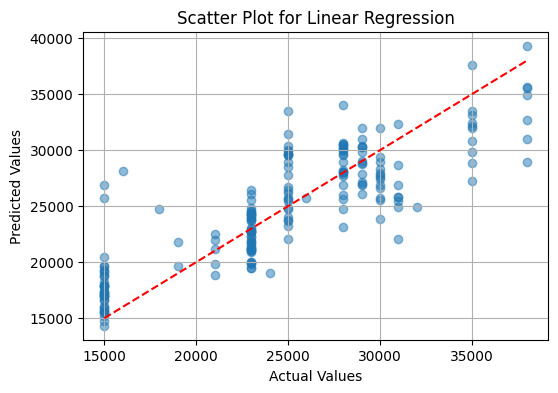

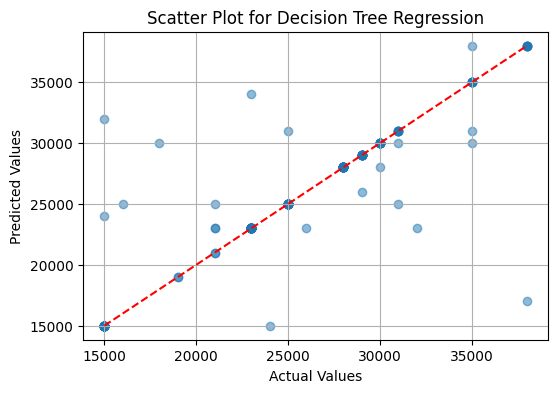

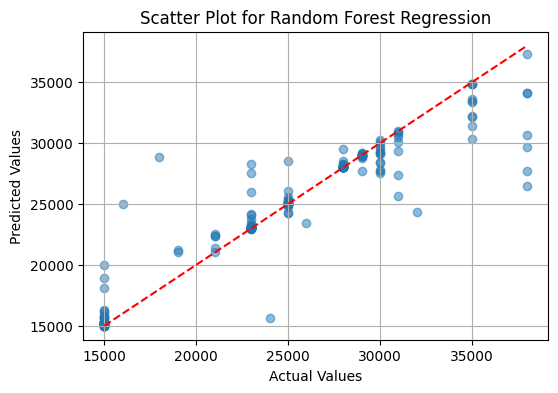

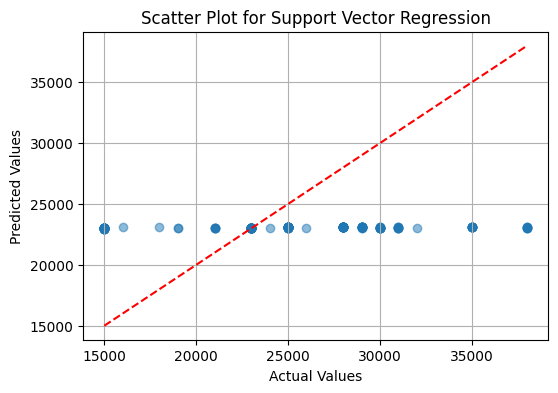

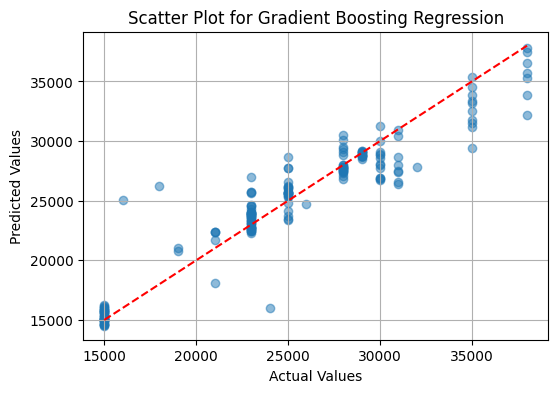

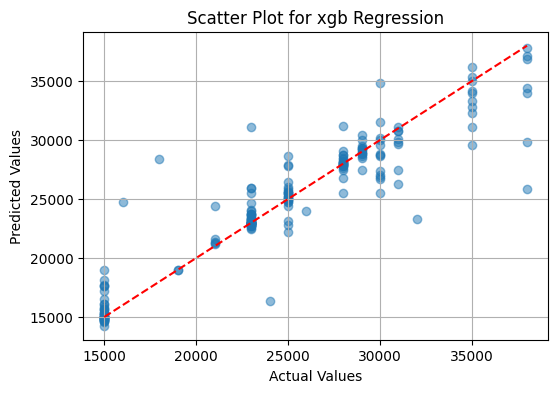

In [32]:
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    # Create a scatter plot
    plt.figure(figsize=(6, 4))
    plt.scatter(y_test, predictions, alpha=0.5)
    plt.title(f'Scatter Plot for {name}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line for perfect prediction
    plt.grid(True)
    plt.show()

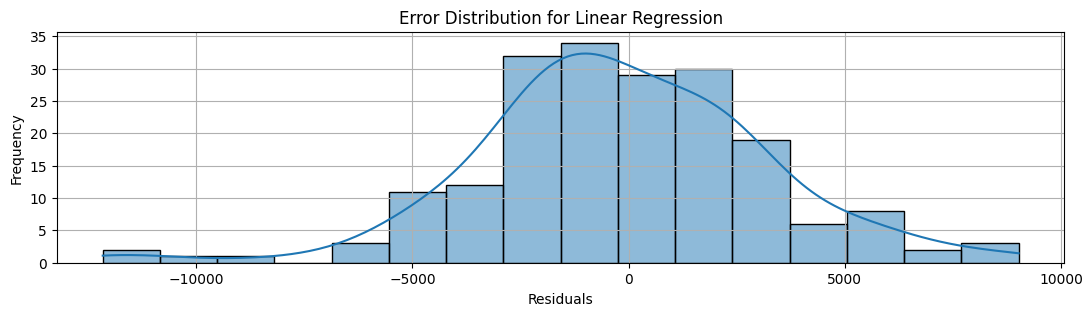

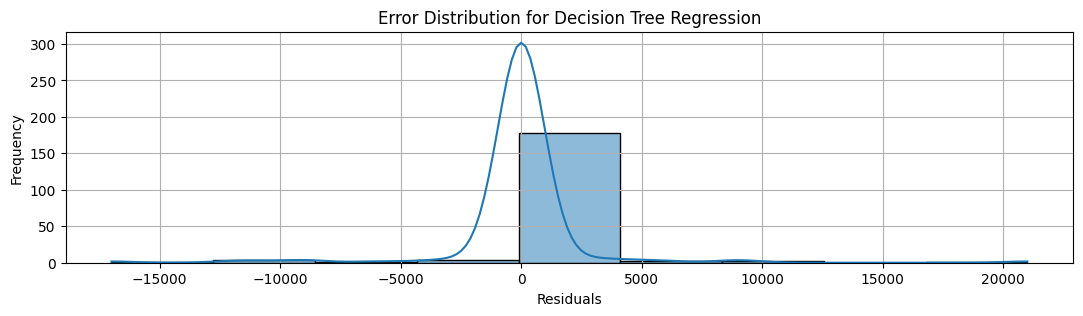

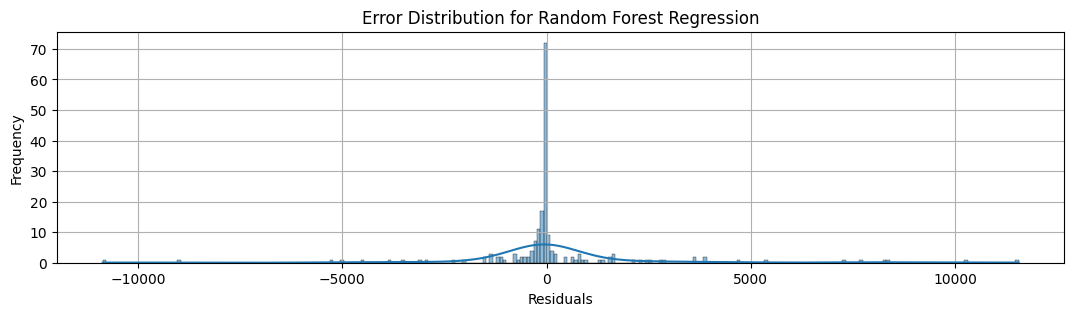

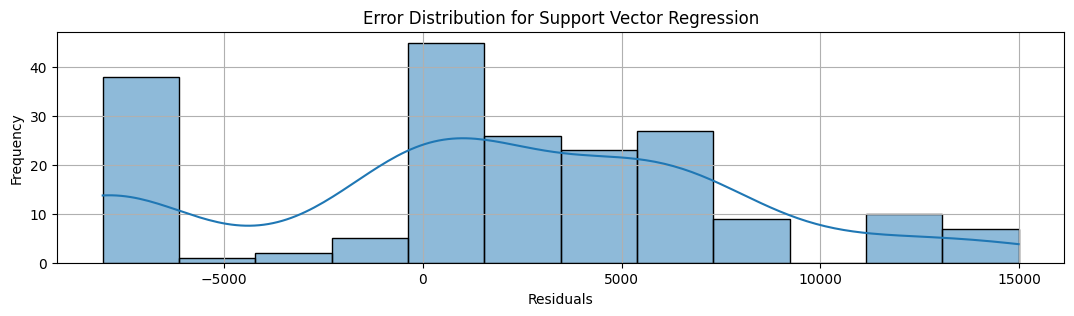

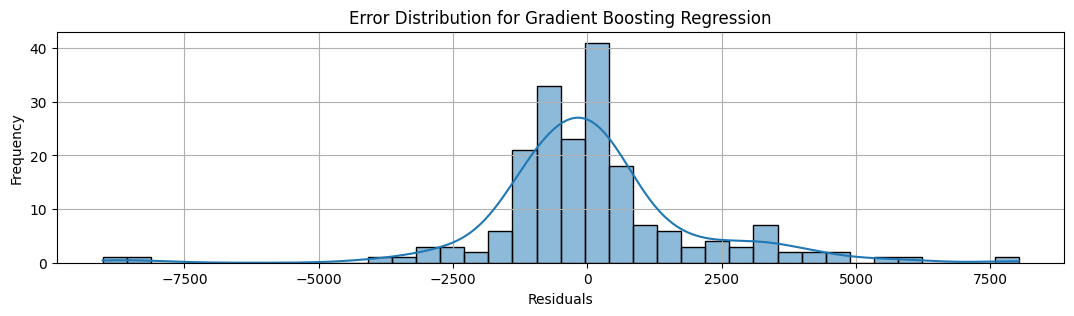

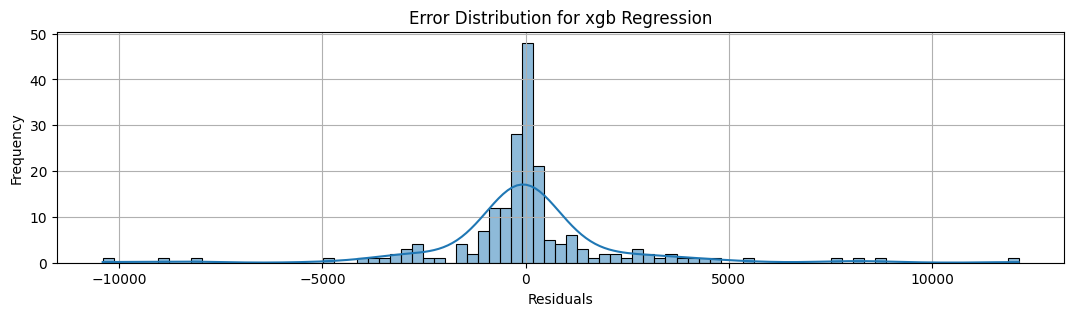

In [33]:
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    residuals = y_test - predictions
    
    plt.figure(figsize=(13, 3))
    sns.histplot(residuals, kde=True)
    plt.title(f'Error Distribution for {name}')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

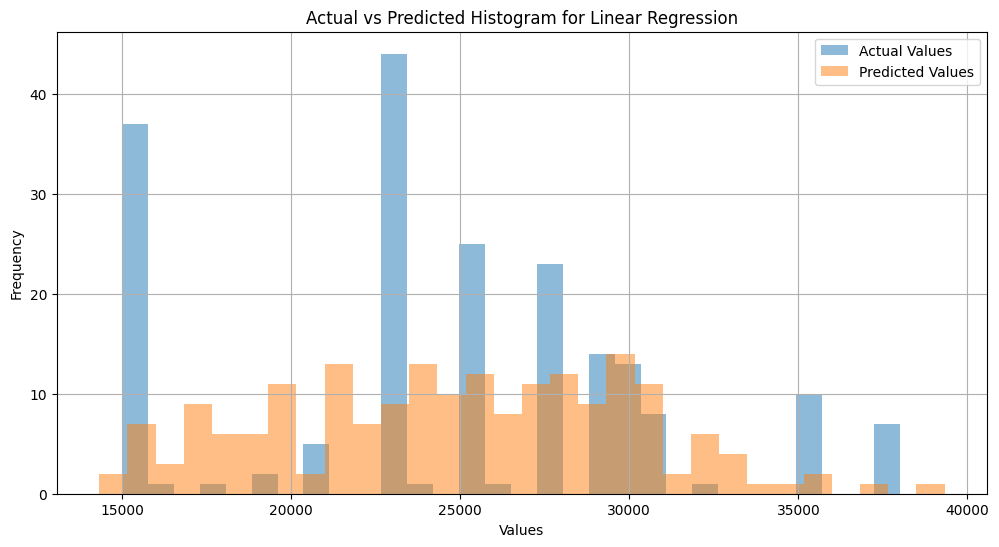

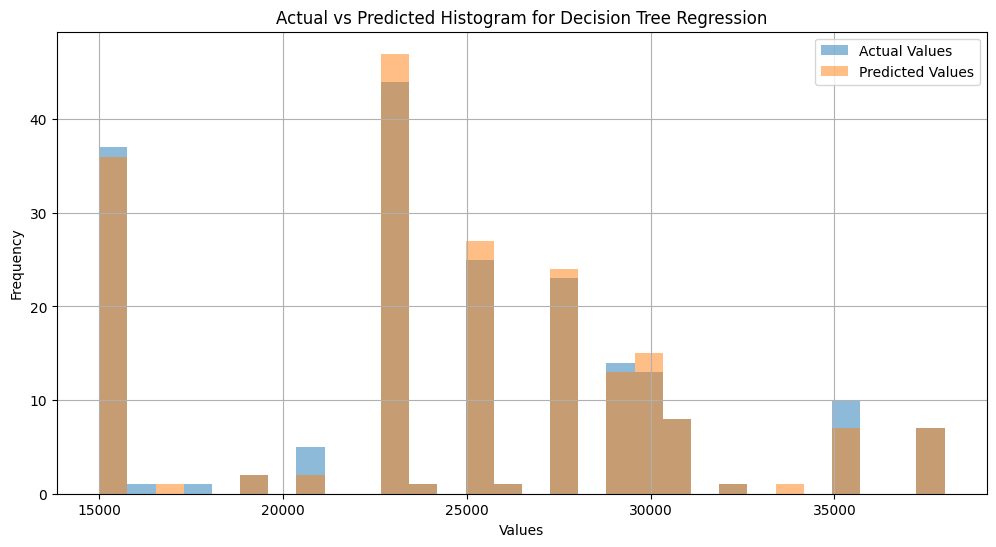

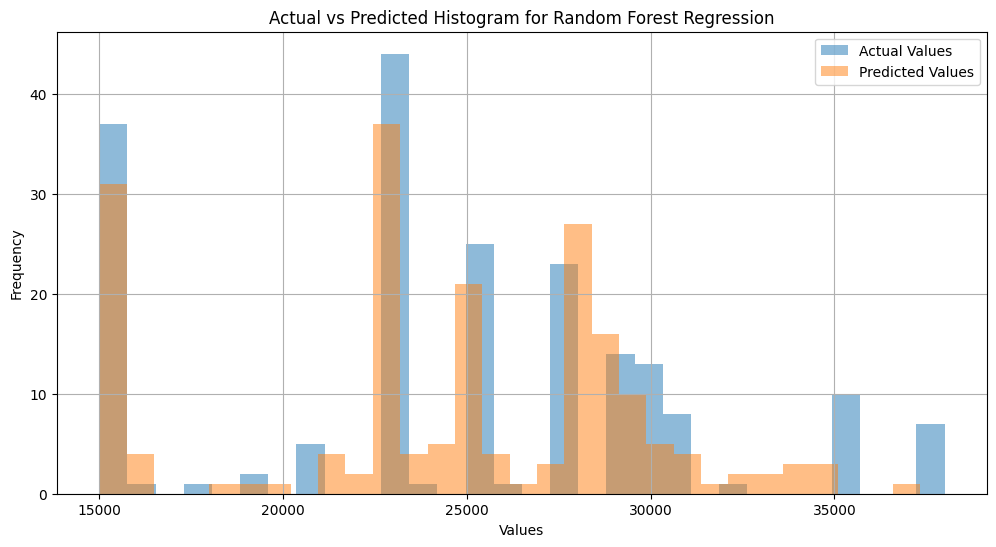

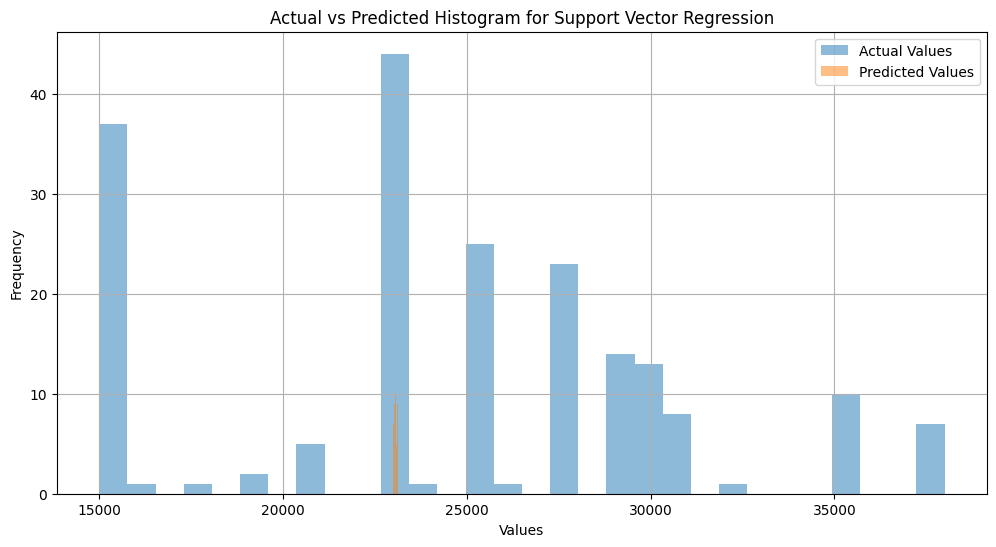

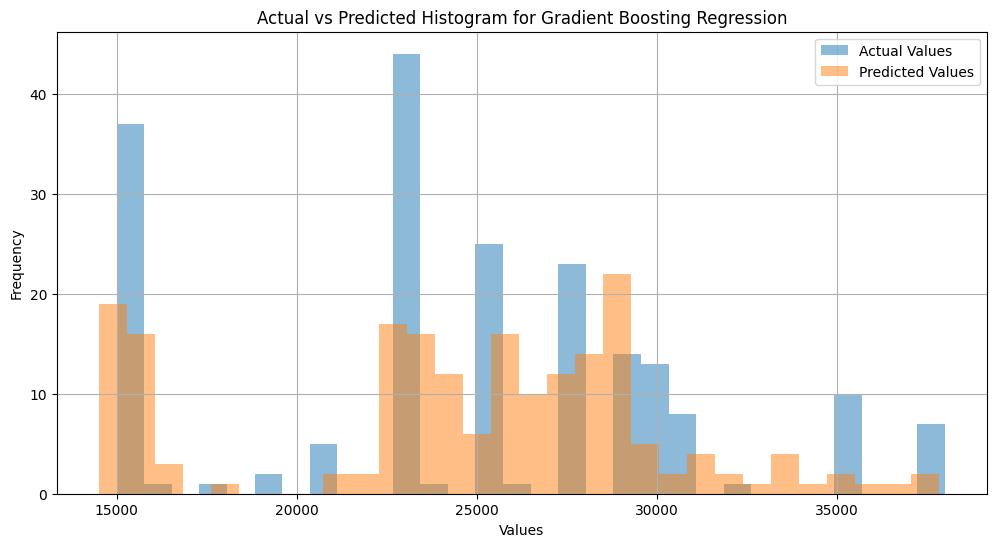

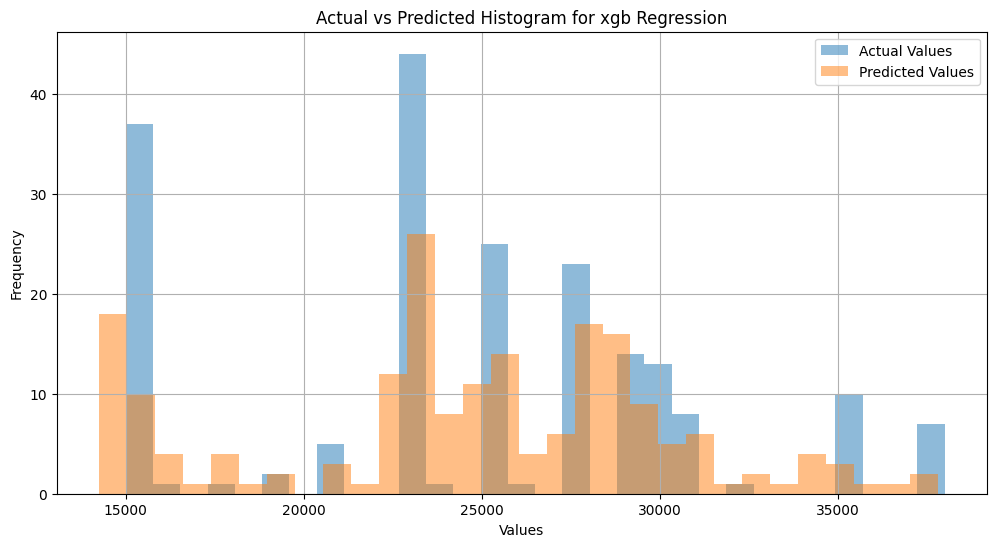

In [34]:
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    plt.figure(figsize=(12, 6))
    plt.hist(y_test, bins=30, alpha=0.5, label='Actual Values')
    plt.hist(predictions, bins=30, alpha=0.5, label='Predicted Values')
    plt.title(f'Actual vs Predicted Histogram for {name}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
# continue with Gradient Boosting and random Forest Regression Model
# Create pickle file for both models
import pickle

gb_model = GradientBoostingRegressor()
gb_model.fit(X_train,y_train)
rf_model = RandomForestRegressor()
rf_model.fit(X_train,y_train)

# Save the models
with open('gb_model.pkl', 'wb') as f:
    pickle.dump(gb_model, f)

with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

In [ ]:
#Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Initialize the Random Forest Regressor
rf = RandomForestRegressor()

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

random_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_grid_rf, n_iter=50, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2, random_state=42)
random_search_rf.fit(X_train, y_train)

print("Best parameters for Random Forest (Randomized Search):", random_search_rf.best_params_)
best_rf_random = random_search_rf.best_estimator_

# Evaluate the model
y_pred_rf_random = best_rf_random.predict(X_test)
print("Random Forest (Randomized Search) - MAE:", mean_absolute_error(y_test, y_pred_rf_random))
print("Random Forest (Randomized Search) - RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf_random)))
print("Random Forest (Randomized Search) - R2 Score:", r2_score(y_test, y_pred_rf_random))

In [ ]:
# Initialize the Gradient Boosting Regressor
gb = GradientBoostingRegressor()

param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Randomized Search for Gradient Boosting
random_search_gb = RandomizedSearchCV(estimator=gb, param_distributions=param_grid_gb, n_iter=50, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2, random_state=42)
random_search_gb.fit(X_train, y_train)

print("Best parameters for Gradient Boosting (Randomized Search):", random_search_gb.best_params_)
best_gb_random = random_search_gb.best_estimator_

# Evaluate the model
y_pred_gb_random = best_gb_random.predict(X_test)
print("Gradient Boosting (Randomized Search) - MAE:", mean_absolute_error(y_test, y_pred_gb_random))
print("Gradient Boosting (Randomized Search) - RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_gb_random)))
print("Gradient Boosting (Randomized Search) - R2 Score:", r2_score(y_test, y_pred_gb_random))